In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PIL import Image
import PIL.ImageOps
import os, ssl, time
files.upload()

Saving image.npz to image (1).npz
Saving labels.csv to labels (1).csv


{'image.npz': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\x1b\xdd\x07\xc9+\x03\x07\x00@\r@\x02\t\x00\x14\x00arr_0.npy\x01\x00\x10\x00@\r@\x02\x00\x00\x00\x00+\x03\x07\x00\x00\x00\x00\x00\xec\xba\xcb\xae5\xcb\x92f\x95ty\x8a\xec%H\xd9HD\xa9\x1a\x88\x1e\x12\xbdBth\xd0B)*K4\x10U\xcaDtJ\x88\x87\xe0\x85\xa9\xa3\xa3\xe0\xc4\xf1\xed\xb7X+\xec\xfb,\xdc\xc6\x90~\xed9=\xe6\xf6\xe1qs37_\xff\xef\xff\xf0?\xfd\x9b\xff\xf1\x7f\xfe\xcf\xfe\xe6\xff\xfa\x9b\xff\xf8w\xff\xf6\x9f\xfe\xe5\x7f\xfd\xe7\xbf\xfbo\xfe\xf6\xef\xfe\xdb\x7f\xf7\xaf\xfe\xee\xef\xff\xf6\xef\xfe\xdd\xbf\xff\xe7\xff\xf3\x9f\xff\xf1\xff\xf8_\xfe\xfd?\xff\xdb\x7f\xfaS\xfb\x7f\xff\x8f\xff\xfb\xbf\xfc\xd3\x7fj\xff\x97\xff\xed\x1f\xff\xc3?\xfd\xa7\xef\xff\xc5\x7f\xf5\xaf\xfe\xeb\x7f\xf8\x87\xbf\xff\xdb\x7f\xfd\xaf\xff\xe1\xbf\xfc\xfb\xbf\xfd\xbf\xff\xf6\x07\xfc\xe7\x7f\x03\xf0\xff\xf3\xff\xfcw\xf3\x7f\x0eg\xb4W\x8d\xc3\xe9\xf6F\xdf\xcb\x95S\xedU\x83\xf7l/\x00\x00\xe4G\x99\xc7\xee\xe4\xce\x8e\x9cK\x85#\x1e\xe3\x8cw\xaa\x9f\xe9\x95\xc7\

F    550
Z    550
M    550
E    550
H    550
P    550
B    550
J    550
O    550
W    550
C    550
A    550
V    550
Y    550
X    550
K    550
T    550
L    550
N    550
G    550
R    550
I    550
S    550
Q    550
U    550
D    550
Name: labels, dtype: int64
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0

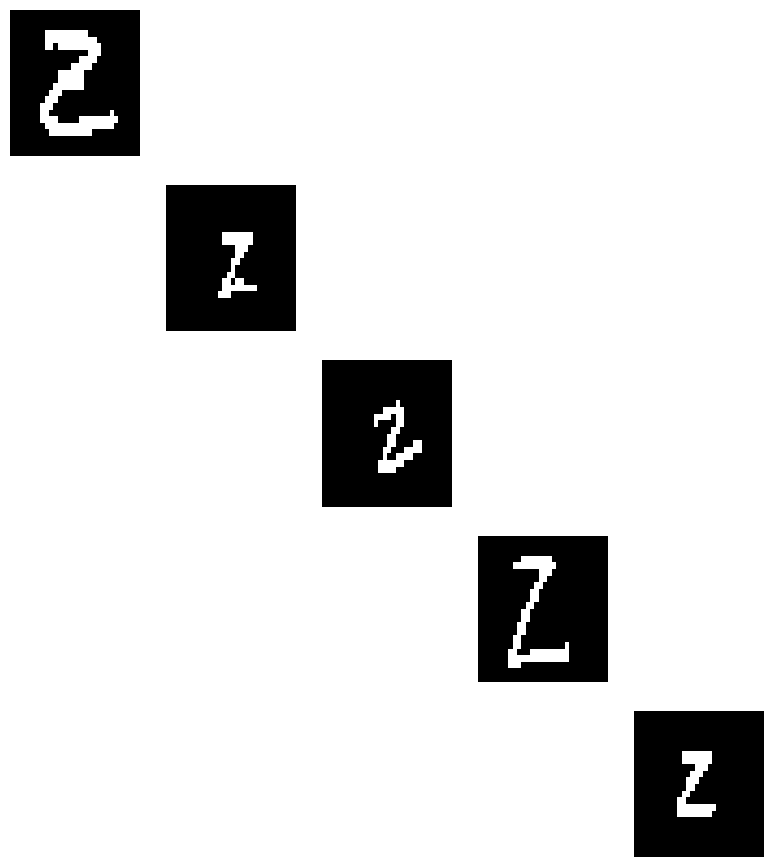

In [4]:
if (not os.environ.get('PYTHONHTTPSVERIFY','') and
    getattr(ssl,'_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

X = np.load('image (1).npz')['arr_0']
y = pd.read_csv("labels (1).csv")["labels"]
print( pd.Series(y).value_counts())
classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
nclasses = len(classes)

samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))
idx_cls = 0

for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0

for idx in idxs:
  plt_idx = i * nclasses + idx_cls + 1
  p = plt.subplot(samples_per_class, nclasses, plt_idx);
  p = sns.heatmap(np.reshape(X[idx], (22,30)), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False);
  p = plt.axis('off');
  i += 1
  idx_cls += 1

idxs = np.flatnonzero(y == '0')
print(np.array(X[0]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The accuracy is:-  0.9952


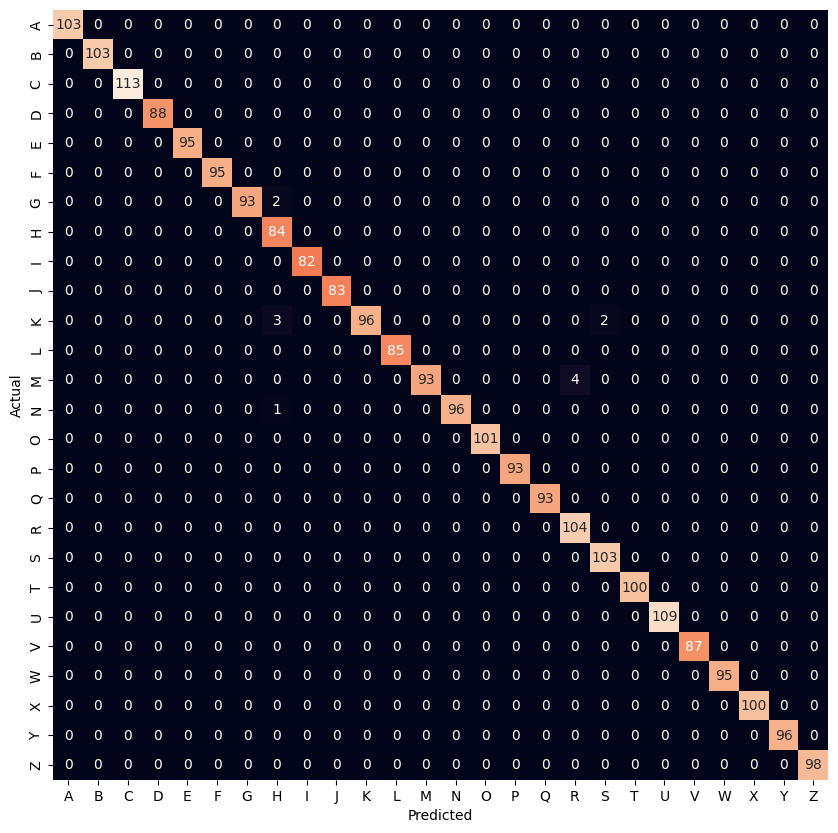

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 9, train_size = 7500, test_size = 2500)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
print(X[0])
print(y[0])
1

clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy is:- ",accuracy)
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
p = plt.figure(figsize = (10,10));
p = sns.heatmap(cm,annot = True, fmt = "d", cbar = False)

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
  try:
    ret,frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    height, width = gray.shape
    upper_left = (int(width/2 - 56), int(height/2 - 56))
    bottom_right = (int(width/2 + 56), int(height/2 + 56))
    cv2.rectangle(gray, upper_left, bottom_right, (0,255,0),2)

    roi = gray[upper_left[1]:bottom_right[1], upper_left[0]:bottom_right[0]]

    im_pil = Image.fromarray(roi)

    image_bw = im_pil.convert('L')
    image_bw_resized = image_bw.resize((28,28), Image.ANTIALIAS)
    image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
    pixel_filter = 20
    min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
    image_bw_resized_inverted_scaled = np.clip(image_bw_resized_inverted-min_pixel,0,255)
    max_pixel = np.max(image_bw_resized_inverted)
    image_bw_resized_inverted_scaled = np.asarray(image_bw_resized_inverted_scaled)/max_pixel
    test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1,784)
    test_pred = clf.predict(test_sample)
    print("Predicted class is:", test_pred)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
  except Exception as e:
     pass

cap.release()
cv2.destroyAllWindows()